<a href="https://colab.research.google.com/github/afiarodoshe/EEG-data-practice/blob/main/UPenn_and_Mayo_Clinic's_Seizure_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [9]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle competitions download -c seizure-detection

100% 10.1G/10.1G [02:04<00:00, 34.5MB/s]
100% 10.1G/10.1G [02:04<00:00, 87.2MB/s]


In [24]:
!tar xvzf clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/

Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_1.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_10.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_11.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_12.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_13.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_14.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_15.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_16.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_17.mat
Volumes/Seagate/seizure_detection/competition_data/

In [14]:
! unzip seizure-detection

Archive:  seizure-detection.zip
  inflating: clips.tar.gz            
  inflating: sampleSubmission.csv    
  inflating: sample_clip.mat.gz      


In [15]:
!ls

clips.tar.gz  kaggle.json	  sample_data		seizure-detection.zip
drive	      sample_clip.mat.gz  sampleSubmission.csv


In [25]:
upenn_ictal_list = []
upenn_interictal_list = []

UPENN_P1_DATA_DIR = !ls Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if re.findall('interictal', file):
    upenn_interictal_list.append(file)
  elif re.findall('ictal', file):
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

In [26]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file

from scipy.io import loadmat

# Load the .mat file using the full file path
mat = loadmat(upenn_seizure_file_path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 23:20:05 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[  389.798,   411.798,   423.798, ...,   -48.202,   -42.202,
           -71.202],
        [ -651.998,  -658.998,  -675.998, ...,   432.002,   438.002,
           399.002],
        [  611.63 ,   580.63 ,   552.63 , ...,   284.63 ,   329.63 ,
           324.63 ],
        ...,
        [   34.07 ,    51.07 ,    95.07 , ...,  -993.93 ,  -949.93 ,
          -917.93 ],
        [  908.28 ,   881.28 ,   851.28 , ..., -1240.72 , -1178.72 ,
         -1153.72 ],
        [  388.216,   360.216,   367.216, ...,  -467.784,  -388.784,
          -337.784]]),
 'freq': array([499.906994]),
 'channels': array([[(array(['LFG1'], dtype='<U4'), array(['LFG10'], dtype='<U5'), array(['LFG11'], dtype='<U5'), array(['LFG12'], dtype='<U5'), array(['LFG13'], dtype='<U5'), array(['LFG14'], dtype='<U5'), array(['LFG15'], dtype='<U5'), array(['LFG16

In [27]:
!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat # Import loadmat

def mat_to_df(file_path, output = False):
  mat = loadmat(file_path)    # load mat-file

  data = mat['data']          # variable in mat file
  channels = mat['channels']  # dtypes of structures are "unsized objects"
  freq = mat['freq'][0]

  channels_list = []
  for channel_array in channels[0][0]:
    channels_list.append(channel_array[0])

  df = pd.DataFrame(data,
                    index=channels_list)

  df = df.T

  # remove columns that do not change value
  df = df.loc[:, (df != df.iloc[0]).any()]

  if output:
    display(df.head())

  return df, freq

# Construct the full file path for both files
upenn_seizure_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file
upenn_baseline_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_baseline_file

# Use the colored function to format the output
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline']))
# Pass the full file path to the mat_to_df function
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file_path, output=True)
print()
print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline']))
# Pass the full file path to the mat_to_df function
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file_path, output=True)

Ictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,...,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,389.798,-651.998,611.63,351.688,103.176,66.252,78.32,507.392,-461.514,-83.116,...,616.894,69.728,1620.14,231.188,232.608,-218.142,1056.024,34.07,908.28,388.216
1,411.798,-658.998,580.63,331.688,98.176,67.252,85.32,479.392,-504.514,-119.116,...,612.894,44.728,1630.14,216.188,213.608,-176.142,1057.024,51.07,881.28,360.216
2,423.798,-675.998,552.63,318.688,95.176,93.252,122.32,440.392,-465.514,-150.116,...,616.894,43.728,1666.14,217.188,201.608,-155.142,1065.024,95.07,851.28,367.216
3,404.798,-734.998,466.63,268.688,61.176,71.252,116.32,322.392,-416.514,-206.116,...,605.894,37.728,1712.14,188.188,174.608,-203.142,1052.024,142.07,814.28,376.216
4,487.798,-703.998,494.63,305.688,100.176,112.252,103.32,269.392,-393.514,-159.116,...,576.894,-0.272,1708.14,209.188,188.608,-183.142,1038.024,195.07,793.28,406.216



Interictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,...,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,10.688,103.162,210.17,162.998,136.606,-72.74,-208.284,79.514,89.008,379.27,...,-173.942,-83.864,-105.22,206.228,-10.986,165.482,-90.626,-171.786,-88.67,-40.884
1,44.688,68.162,229.17,185.998,116.606,-59.74,-222.284,79.514,115.008,394.27,...,-138.942,-63.864,-87.22,185.228,-35.986,157.482,-45.626,-169.786,-93.67,-67.884
2,59.688,3.162,223.17,191.998,96.606,-66.74,-248.284,30.514,122.008,403.27,...,-117.942,-48.864,-73.22,147.228,-51.986,87.482,-15.626,-162.786,-74.67,-85.884
3,65.688,-40.838,258.17,199.998,101.606,-56.74,-254.284,28.514,161.008,411.27,...,-114.942,-45.864,-63.22,129.228,-34.986,53.482,8.374,-144.786,-55.67,-69.884
4,62.688,-87.838,238.17,186.998,119.606,-75.74,-244.284,9.514,168.008,396.27,...,-121.942,-38.864,-46.22,104.228,-12.986,25.482,31.374,-146.786,-56.67,-53.884


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.8 MB/s eta 0:00:00
Interictal


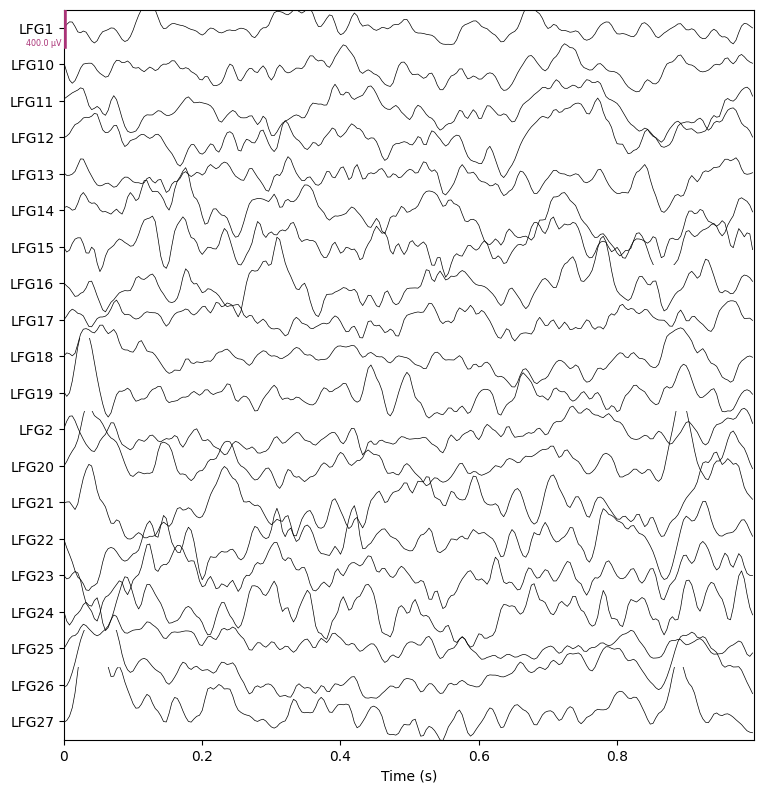


Ictal


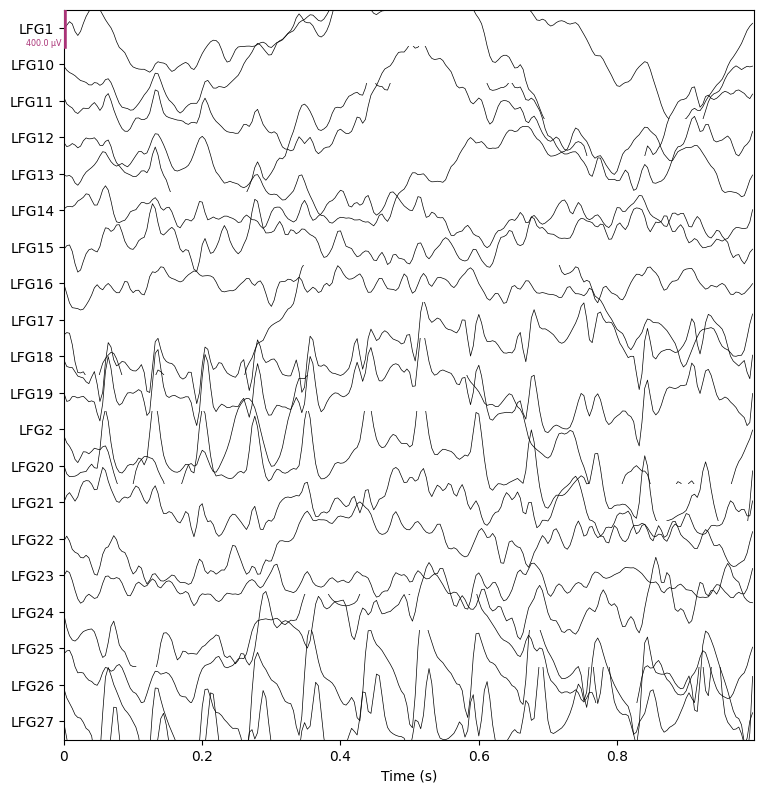

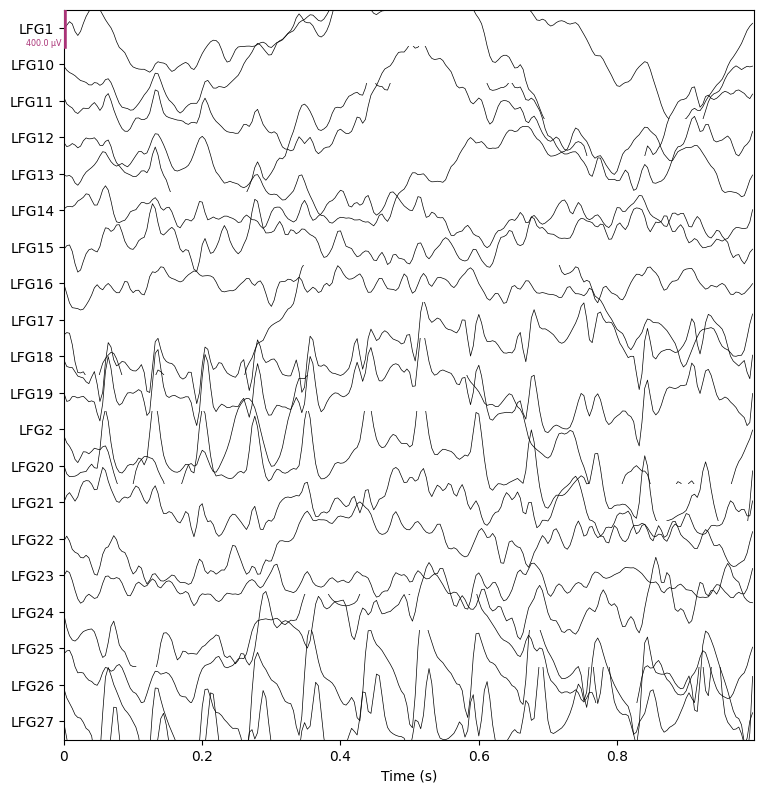

In [28]:
!pip install mne
import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

Ictal


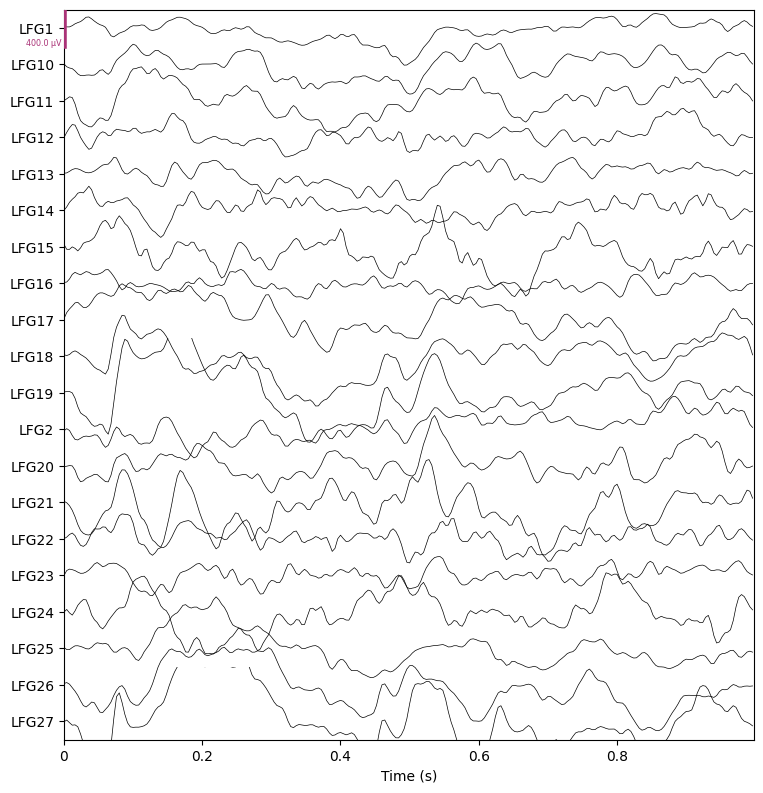

Interictal


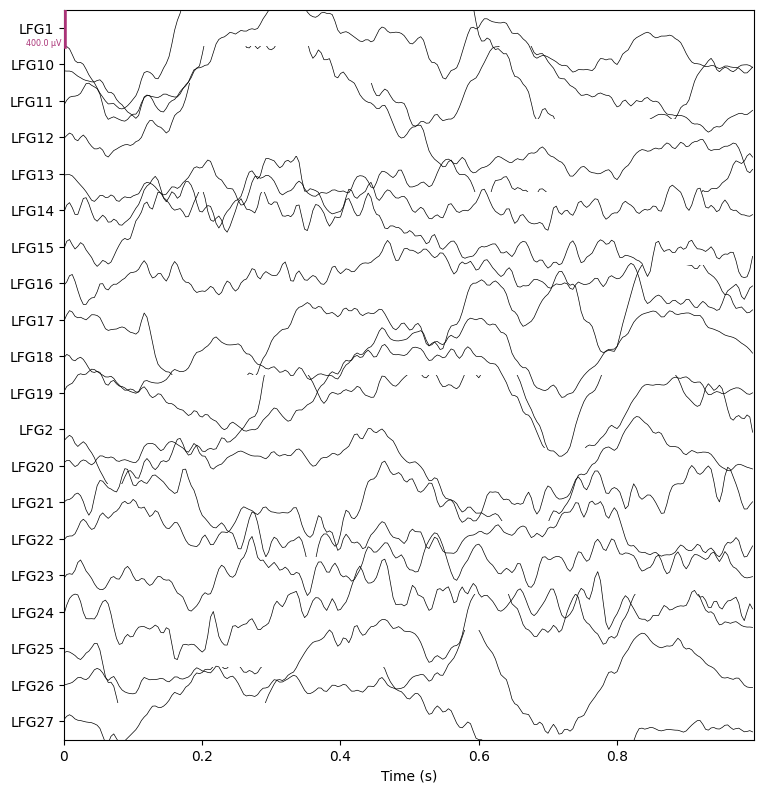

In [49]:
!pip install mne
import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored # Import the colored function from termcolor
import random # Import the random module

# set mne to only output warnings
mne.set_log_level('WARNING')

# Define the base directory path
base_dir = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/'

for i, sampled_files in enumerate([random.sample(upenn_interictal_list, 1),
                                   random.sample(upenn_ictal_list, 1)]):

  if i == 0:
    # Use the colored function from termcolor to format the output
    print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline']))
  else:
    # Use the colored function from termcolor to format the output
    print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline']))
  for file in sampled_files:
      # Construct the full file path by joining the base directory and filename
      full_file_path = os.path.join(base_dir, file)
      upenn_df, upenn_freq = mat_to_df(full_file_path) # Pass the full file path to mat_to_df
      upenn_mne = mne_object(upenn_df, upenn_freq)
      upenn_mne.plot(**plot_kwargs)

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b762acd1e1b91d6278a2c2cbcf6a347a0ca134105b7790e4c2ab15af8743227a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.2 MB/s eta 0:00:00


In [30]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

In [31]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=8d35fa37797e09f31fdf151f58f956c922c6e5eb6db840e5120477ed09b97265
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.4 MB/s eta 0:00:00


In [48]:
!from google.colab import files
!df.to_csv('data.csv')
!files.download('data.csv')

/bin/bash: line 1: from: command not found
/bin/bash: -c: line 1: syntax error near unexpected token `'data.csv''
/bin/bash: -c: line 1: `df.to_csv('data.csv')'
/bin/bash: -c: line 1: syntax error near unexpected token `'data.csv''
/bin/bash: -c: line 1: `files.download('data.csv')'
